In [1]:
pip install scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "data/walmart_final.csv" 
data = pd.read_csv(file_path)

In [4]:

# Girdi ve hedef değişkenlerin ayrılması
X = data.drop(columns=['Weekly_Sales'])
y = data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Modeli eğitme
    model.fit(X_train, y_train)
    # Tahmin yapma
    predictions = model.predict(X_test)
    # RMSE hesaplama
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    results[name] = rmse

# Sonuçları yazdırma
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['RMSE'])
print(results_df)


                           RMSE
Linear Regression  21002.256437
Random Forest       3151.281906
XGBoost             5137.352379


In [5]:
## Satış Tahmini (Sales Forecasting)
## haftalık satışları tahmin etmek  
## Bu, mağaza yönetiminin envanter ve iş gücü planlamasını optimize etmesine yardımcı olabilir.

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelinin tanımlanması ve eğitilmesi
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
predictions = model.predict(X_test)

# RMSE hesaplama
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Random Forest Model RMSE: {rmse}')

Random Forest Model RMSE: 3151.281906034669


In [6]:
# Toplam gerçek haftalık satışları hesaplama
total_actual_sales = y_test.sum()
print(f'Total Actual Weekly Sales: {total_actual_sales}')

# RMSE'nin toplam satışlar içindeki oranı
rmse_percentage = (rmse / total_actual_sales) * 100
print(f'RMSE as a Percentage of Total Sales: {rmse_percentage:.2f}%')

# Tahmin sonuçlarını DataFrame olarak kaydetme
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.to_csv('predicted_sales.csv', index=False)

## Bu, modelin tahmin ettiği haftalık satışların gerçek satışlardan ortalama olarak 3151.28 dolar sapma gösterdiği anlamına gelir. 
## Yani, Random Forest modeli satışları tahmin ederken, ortalama olarak 3151.28 dolar hata yapmaktadır.

Total Actual Weekly Sales: 1330699655.0900002
RMSE as a Percentage of Total Sales: 0.00%


In [7]:

# Test seti üzerinde tahmin yapma
predictions = model.predict(X_test)

# Hata aralığı belirleme
threshold = 1000

# Tahminlerin belirli bir hata aralığında olup olmadığını hesaplama
accurate_predictions = np.abs(y_test - predictions) <= threshold
inaccurate_predictions = ~accurate_predictions

# Doğru ve yanlış tahminlerin sayısını hesaplama
correct_count = np.sum(accurate_predictions)
incorrect_count = np.sum(inaccurate_predictions)


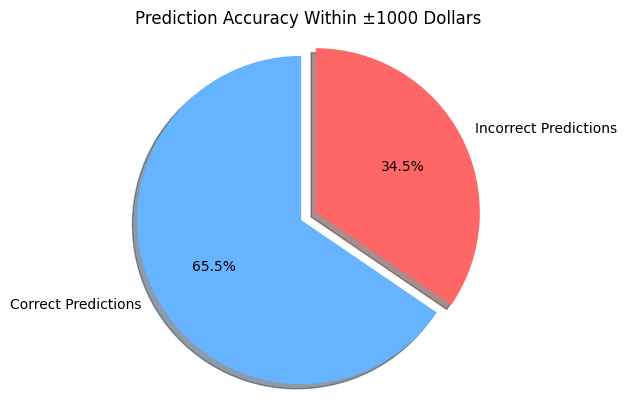

In [8]:
# Daire grafiği verileri
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [correct_count, incorrect_count]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)  # Bir dilimi vurgulamak için

# Daire grafiği çizme
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Eşit oranlarda daire grafiği

plt.title(f'Prediction Accuracy Within ±{threshold} Dollars')
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

file_path = "data/walmart_final.csv" 
data = pd.read_csv(file_path)

# Yüksek performanslı mağazaları tanımlamak için eşik değeri belirleme
threshold = data['Weekly_Sales'].median()
data['High_Performance'] = np.where(data['Weekly_Sales'] > threshold, 1, 0)

# Özelliklerin seçilmesi
features = ['Store', 'Dept', 'Day', 'Month', 'Year', 'Temperature', 'Fuel_Price', 
            'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
            'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C']
X = data[features]
y = data['High_Performance']

In [10]:

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelinin tanımlanması ve eğitilmesi
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Yüksek ve düşük performanslı mağazaları belirleme
high_performance_stores = data[data['High_Performance'] == 1]
low_performance_stores = data[data['High_Performance'] == 0]

# Yüksek ve düşük performanslı mağazaları CSV dosyasına kaydetme
high_performance_stores.to_csv('high_performance_stores.csv', index=False)
low_performance_stores.to_csv('low_performance_stores.csv', index=False)

print("Yüksek ve düşük performanslı mağazalar'high_performance_stores.csv' and 'low_performance_stores.csv' olarak kaydedildi.")


Yüksek ve düşük performanslı mağazalar'high_performance_stores.csv' and 'low_performance_stores.csv' olarak kaydedildi.


Confusion Matrix:
[[36628  5554]
 [ 7215 34628]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     42182
           1       0.86      0.83      0.84     41843

    accuracy                           0.85     84025
   macro avg       0.85      0.85      0.85     84025
weighted avg       0.85      0.85      0.85     84025


Accuracy Score:
0.8480333234156501


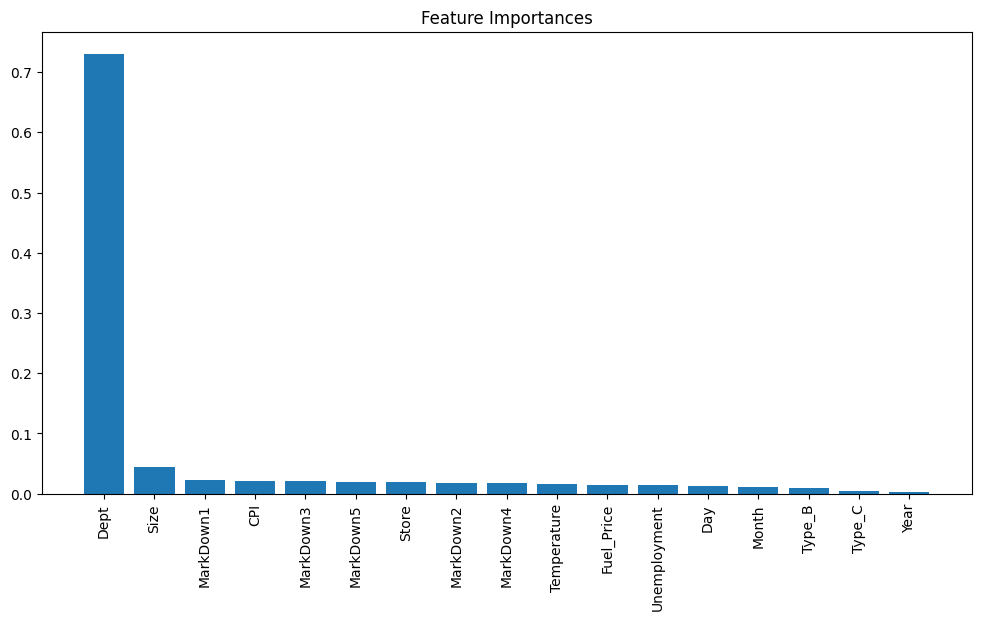

In [15]:

# Modelin performansını değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Özellik önem derecelerini görselleştirme
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()
